In [1]:
import numpy as np
import networkx as nx
import torch
from torch_geometric.data import Data
import time

import random
from torch_geometric.utils import from_networkx

import matplotlib.pyplot as plt

from torch_geometric.nn import SAGEConv

from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import torch.nn.functional as F

import sys
sys.path.insert(1,'../src')
from DataLoader_rad import RGGDataset_rad
from TwoLayerGraphSage import GCN, cGCN

import os.path as osp
import pickle

import torch
from torch_geometric.data import Dataset, download_url

import os


DL = RGGDataset_rad(root = '//home/groups/ai/maskey/input_rad')

/home/math/maskey/anaconda3/envs/pyg_cuda102/lib/python3.8/site-packages/torch_geometric/data/storage.py:244: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
14:40:27|TQ-INFO| Initializing torchquad.


In [2]:
import pickle

In [3]:
model = GCN()
model.load_state_dict(torch.load( '../models/GCNTwoLayersGraphSage'))

cGCNN = cGCN()
cGCNN.load_state_dict(torch.load( '../models/cGCNTwoLayersGraphSage'))

<All keys matched successfully>

In [17]:
L2Errors = []
start = time.time()

#low_pass = lambda x:  (1+(torch.tensor(x[:,0]**2 + x[:,1]**2))).pow_(-1)
low_pass = lambda x:  x[:,0]*x[:,1]

In [18]:
y = torch.rand(1000,1)

In [23]:
for i in range(10, 150, 10):
    data = DL.get(5, i) 
    pos = positions[int((i-10)/10)]
    signal = low_pass(pos[0])
    signal = torch.reshape(signal,( len(signal),1))
    data.x = signal
    
    #nodeErrors = output[pos[1].type(torch.LongTensor)] - model.forward(data)
    #L2Error = torch.sqrt(1/len(nodeErrors)*torch.sum(torch.pow(nodeErrors,2)))
    #L2Errors.append(L2Error)
    
    cfct = cGCNN.forward(low_pass, radius = 0.5)
        
    b = torch.empty(( 0 ))
    for w in pos[0]:
        b = torch.cat((b, cfct(w)), 0)
        #d = torch.reshape(b,(4, len(x)))
        
    #data = DL.get(i)
    #data = data.to(device)
    nodeErrors = b - model.forward(data)
    #L2Error = torch.sqrt(1/len(nodeErrors)*torch.sum(torch.pow(nodeErrors,2)))
    L2Error = torch.sqrt(torch.mean(torch.pow(nodeErrors,2)))

    L2Errors.append(L2Error)

    

14:48:13|TQ-INFO| Integration grid created.
14:48:13|TQ-INFO| Computed integral was tensor(-0.2786880434, grad_fn=<SumBackward1>).
14:48:13|TQ-INFO| Integration grid created.
14:48:13|TQ-INFO| Computed integral was tensor(0.4219114482).
14:48:13|TQ-INFO| Integration grid created.
14:48:13|TQ-INFO| Computed integral was tensor(-0.2163754106, grad_fn=<SumBackward1>).
14:48:13|TQ-INFO| Integration grid created.
14:48:13|TQ-INFO| Computed integral was tensor(0.3580887020).
14:48:13|TQ-INFO| Integration grid created.
14:48:13|TQ-INFO| Computed integral was tensor(-0.4254870415, grad_fn=<SumBackward1>).
14:48:13|TQ-INFO| Integration grid created.
14:48:13|TQ-INFO| Computed integral was tensor(0.6056951284).
14:48:13|TQ-INFO| Integration grid created.
14:48:13|TQ-INFO| Computed integral was tensor(-0.4033600390, grad_fn=<SumBackward1>).
14:48:13|TQ-INFO| Integration grid created.
14:48:13|TQ-INFO| Computed integral was tensor(0.5723717213).
14:48:13|TQ-INFO| Integration grid created.
14:48:13

14:48:14|TQ-INFO| Computed integral was tensor(0.3986830711).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(-0.4982816577, grad_fn=<SumBackward1>).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(0.7526224256).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(-0.3611386418, grad_fn=<SumBackward1>).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(0.5470619202).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(-0.3463566899, grad_fn=<SumBackward1>).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(0.4728037119).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(-0.2490222752, grad_fn=<SumBackward1>).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(0.392

14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(0.3223153353).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(-0.3119909763, grad_fn=<SumBackward1>).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(0.4210775197).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(-0.2458776236, grad_fn=<SumBackward1>).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(0.4027963877).
14:48:14|TQ-INFO| Integration grid created.
14:48:14|TQ-INFO| Computed integral was tensor(-0.2349925339, grad_fn=<SumBackward1>).
14:48:14|TQ-INFO| Integration grid created.
14:48:15|TQ-INFO| Computed integral was tensor(0.3517214954).
14:48:15|TQ-INFO| Integration grid created.
14:48:15|TQ-INFO| Computed integral was tensor(-0.4514642656, grad_fn=<SumBackward1>).
14:48:15|TQ-INFO| Integration grid created.
14:48:15

14:48:15|TQ-INFO| Computed integral was tensor(-0.4061752260, grad_fn=<SumBackward1>).
14:48:15|TQ-INFO| Integration grid created.
14:48:15|TQ-INFO| Computed integral was tensor(0.6083152890).
14:48:15|TQ-INFO| Integration grid created.
14:48:15|TQ-INFO| Computed integral was tensor(-0.3125393689, grad_fn=<SumBackward1>).
14:48:15|TQ-INFO| Integration grid created.
14:48:15|TQ-INFO| Computed integral was tensor(0.4463748932).
14:48:15|TQ-INFO| Integration grid created.
14:48:15|TQ-INFO| Computed integral was tensor(-0.2328325659, grad_fn=<SumBackward1>).
14:48:15|TQ-INFO| Integration grid created.
14:48:15|TQ-INFO| Computed integral was tensor(0.3016834259).
14:48:15|TQ-INFO| Integration grid created.
14:48:15|TQ-INFO| Computed integral was tensor(-0.1357519776, grad_fn=<SumBackward1>).
14:48:15|TQ-INFO| Integration grid created.
14:48:15|TQ-INFO| Computed integral was tensor(0.2294785678).
14:48:15|TQ-INFO| Integration grid created.
14:48:15|TQ-INFO| Computed integral was tensor(-0.46

14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(-0.2195863724, grad_fn=<SumBackward1>).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(0.3351331055).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(-0.3681841195, grad_fn=<SumBackward1>).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(0.5108084679).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(-0.2523872554, grad_fn=<SumBackward1>).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(0.4144488871).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(-0.2731580138, grad_fn=<SumBackward1>).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(0.3887998760).
14:48:16|TQ-INFO| Integration grid created.
14:48:16

14:48:16|TQ-INFO| Computed integral was tensor(0.3788941503).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(-0.3493170738, grad_fn=<SumBackward1>).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(0.5177301168).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(-0.2737163007, grad_fn=<SumBackward1>).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(0.4032471776).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(-0.2631806135, grad_fn=<SumBackward1>).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(0.3449373841).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(-0.2636524439, grad_fn=<SumBackward1>).
14:48:16|TQ-INFO| Integration grid created.
14:48:16|TQ-INFO| Computed integral was tensor(0.385

14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(0.6333230138).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(-0.2101463079, grad_fn=<SumBackward1>).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(0.3196918368).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(-0.3591447473, grad_fn=<SumBackward1>).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(0.5679541230).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(-0.2450434715, grad_fn=<SumBackward1>).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(0.4034883380).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(-0.3477649987, grad_fn=<SumBackward1>).
14:48:17|TQ-INFO| Integration grid created.
14:48:17

14:48:17|TQ-INFO| Computed integral was tensor(-0.2821823955, grad_fn=<SumBackward1>).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(0.3852883577).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(-0.2077746987, grad_fn=<SumBackward1>).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(0.2653195560).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(-0.2091396451, grad_fn=<SumBackward1>).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(0.3466165364).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(-0.3611386418, grad_fn=<SumBackward1>).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(0.5470619202).
14:48:17|TQ-INFO| Integration grid created.
14:48:17|TQ-INFO| Computed integral was tensor(-0.41

14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(-0.3224047720, grad_fn=<SumBackward1>).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(0.4453155994).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(-0.3607897162, grad_fn=<SumBackward1>).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(0.4990026355).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(-0.3336463571, grad_fn=<SumBackward1>).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(0.4535083771).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(-0.3823338151, grad_fn=<SumBackward1>).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(0.6055576205).
14:48:18|TQ-INFO| Integration grid created.
14:48:18

14:48:18|TQ-INFO| Computed integral was tensor(0.4164864123).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(-0.2458776236, grad_fn=<SumBackward1>).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(0.4027963877).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(-0.4499813318, grad_fn=<SumBackward1>).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(0.6648433208).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(-0.3684657812, grad_fn=<SumBackward1>).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(0.5661250949).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(-0.3731828630, grad_fn=<SumBackward1>).
14:48:18|TQ-INFO| Integration grid created.
14:48:18|TQ-INFO| Computed integral was tensor(0.594

14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(0.6360716224).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(-0.4112459421, grad_fn=<SumBackward1>).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(0.6445630789).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(-0.2392768562, grad_fn=<SumBackward1>).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(0.3812629580).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(-0.3926350176, grad_fn=<SumBackward1>).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(0.5423220396).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(-0.3323453367, grad_fn=<SumBackward1>).
14:48:19|TQ-INFO| Integration grid created.
14:48:19

14:48:19|TQ-INFO| Computed integral was tensor(-0.3940952718, grad_fn=<SumBackward1>).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(0.5889341831).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(-0.4929039776, grad_fn=<SumBackward1>).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(0.7553676367).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(-0.3216666877, grad_fn=<SumBackward1>).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(0.4476596117).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(-0.3760798275, grad_fn=<SumBackward1>).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(0.5953543782).
14:48:19|TQ-INFO| Integration grid created.
14:48:19|TQ-INFO| Computed integral was tensor(-0.29

14:48:20|TQ-INFO| Integration grid created.
14:48:20|TQ-INFO| Computed integral was tensor(-0.2736750841, grad_fn=<SumBackward1>).
14:48:20|TQ-INFO| Integration grid created.
14:48:20|TQ-INFO| Computed integral was tensor(0.4084062874).
14:48:20|TQ-INFO| Integration grid created.
14:48:20|TQ-INFO| Computed integral was tensor(-0.2669295967, grad_fn=<SumBackward1>).
14:48:20|TQ-INFO| Integration grid created.
14:48:20|TQ-INFO| Computed integral was tensor(0.3875061572).
14:48:20|TQ-INFO| Integration grid created.
14:48:20|TQ-INFO| Computed integral was tensor(-0.4214073122, grad_fn=<SumBackward1>).
14:48:20|TQ-INFO| Integration grid created.
14:48:20|TQ-INFO| Computed integral was tensor(0.6591478586).
14:48:20|TQ-INFO| Integration grid created.
14:48:20|TQ-INFO| Computed integral was tensor(-0.4487572312, grad_fn=<SumBackward1>).
14:48:20|TQ-INFO| Integration grid created.
14:48:20|TQ-INFO| Computed integral was tensor(0.6419237852).
14:48:20|TQ-INFO| Integration grid created.
14:48:20

14:48:21|TQ-INFO| Computed integral was tensor(0.5929122567).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(-0.3501260281, grad_fn=<SumBackward1>).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(0.5613852143).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(-0.2667902112, grad_fn=<SumBackward1>).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(0.3552127779).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(-0.3958848119, grad_fn=<SumBackward1>).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(0.5606448054).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(-0.2418958247, grad_fn=<SumBackward1>).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(0.353

14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(0.7342646718).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(-0.1955934167, grad_fn=<SumBackward1>).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(0.3257862926).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(-0.2934412062, grad_fn=<SumBackward1>).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(0.4545654655).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(-0.2328325659, grad_fn=<SumBackward1>).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(0.3016834259).
14:48:21|TQ-INFO| Integration grid created.
14:48:21|TQ-INFO| Computed integral was tensor(-0.3514247239, grad_fn=<SumBackward1>).
14:48:21|TQ-INFO| Integration grid created.
14:48:21

14:48:22|TQ-INFO| Computed integral was tensor(-0.3164652586, grad_fn=<SumBackward1>).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(0.4546488523).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(-0.4982816577, grad_fn=<SumBackward1>).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(0.7526224256).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(-0.2347888350, grad_fn=<SumBackward1>).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(0.3717876971).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(-0.5096328855, grad_fn=<SumBackward1>).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(0.7586357594).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(-0.30

14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(-0.3222839832, grad_fn=<SumBackward1>).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(0.5193528533).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(-0.2636524439, grad_fn=<SumBackward1>).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(0.3852252662).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(-0.3568195105, grad_fn=<SumBackward1>).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(0.5487049222).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(-0.4601135850, grad_fn=<SumBackward1>).
14:48:22|TQ-INFO| Integration grid created.
14:48:22|TQ-INFO| Computed integral was tensor(0.6617442369).
14:48:22|TQ-INFO| Integration grid created.
14:48:22

14:48:23|TQ-INFO| Computed integral was tensor(0.3431884050).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(-0.2678866088, grad_fn=<SumBackward1>).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(0.3534705043).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(-0.4058994949, grad_fn=<SumBackward1>).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(0.6206979752).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(-0.3466746211, grad_fn=<SumBackward1>).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(0.4710592628).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(-0.3685879111, grad_fn=<SumBackward1>).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(0.507

14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(0.4553363025).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(-0.4520887434, grad_fn=<SumBackward1>).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(0.6655713320).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(-0.1976571977, grad_fn=<SumBackward1>).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(0.3064571321).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(-0.2819375992, grad_fn=<SumBackward1>).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(0.4069480300).
14:48:23|TQ-INFO| Integration grid created.
14:48:23|TQ-INFO| Computed integral was tensor(-0.4337861240, grad_fn=<SumBackward1>).
14:48:23|TQ-INFO| Integration grid created.
14:48:23

14:48:24|TQ-INFO| Computed integral was tensor(-0.4295548797, grad_fn=<SumBackward1>).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(0.6181319952).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(-0.3099910319, grad_fn=<SumBackward1>).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(0.5005330443).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(-0.2502116859, grad_fn=<SumBackward1>).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(0.4023140371).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(-0.3283438087, grad_fn=<SumBackward1>).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(0.4431293011).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(-0.26

14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(-0.2319123745, grad_fn=<SumBackward1>).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(0.3830119669).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(-0.3987473249, grad_fn=<SumBackward1>).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(0.6313813329).
14:48:24|TQ-INFO| Integration grid created.
14:48:24|TQ-INFO| Computed integral was tensor(-0.5151953697, grad_fn=<SumBackward1>).
14:48:24|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(0.7570512295).
14:48:25|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(-0.1702660173, grad_fn=<SumBackward1>).
14:48:25|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(0.2132461965).
14:48:25|TQ-INFO| Integration grid created.
14:48:25

14:48:25|TQ-INFO| Computed integral was tensor(0.6201705337).
14:48:25|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(-0.2741538882, grad_fn=<SumBackward1>).
14:48:25|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(0.4457595646).
14:48:25|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(-0.4646275043, grad_fn=<SumBackward1>).
14:48:25|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(0.7008533478).
14:48:25|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(-0.3741294444, grad_fn=<SumBackward1>).
14:48:25|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(0.5555860400).
14:48:25|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(-0.3716405630, grad_fn=<SumBackward1>).
14:48:25|TQ-INFO| Integration grid created.
14:48:25|TQ-INFO| Computed integral was tensor(0.515

14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(0.4060058892).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(-0.3585840464, grad_fn=<SumBackward1>).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(0.5731503367).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(-0.2029203773, grad_fn=<SumBackward1>).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(0.3374590874).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(-0.2876864970, grad_fn=<SumBackward1>).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(0.3811119199).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(-0.2346889228, grad_fn=<SumBackward1>).
14:48:26|TQ-INFO| Integration grid created.
14:48:26

14:48:26|TQ-INFO| Computed integral was tensor(-0.3171095550, grad_fn=<SumBackward1>).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(0.4255086184).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(-0.3001197875, grad_fn=<SumBackward1>).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(0.4873073697).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(-0.4058994949, grad_fn=<SumBackward1>).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(0.6206979752).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(-0.4034556448, grad_fn=<SumBackward1>).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(0.6197874546).
14:48:26|TQ-INFO| Integration grid created.
14:48:26|TQ-INFO| Computed integral was tensor(-0.19

14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(-0.2106045187, grad_fn=<SumBackward1>).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(0.3491949737).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(-0.2093750834, grad_fn=<SumBackward1>).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(0.3223130703).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(-0.3363727927, grad_fn=<SumBackward1>).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(0.5382087231).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(-0.4512783587, grad_fn=<SumBackward1>).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(0.6397419572).
14:48:27|TQ-INFO| Integration grid created.
14:48:27

14:48:27|TQ-INFO| Computed integral was tensor(0.6755830050).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(-0.2093531191, grad_fn=<SumBackward1>).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(0.3120602369).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(-0.2268520445, grad_fn=<SumBackward1>).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(0.3743638992).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(-0.1579886526, grad_fn=<SumBackward1>).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(0.2656621337).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(-0.2705185413, grad_fn=<SumBackward1>).
14:48:27|TQ-INFO| Integration grid created.
14:48:27|TQ-INFO| Computed integral was tensor(0.438

14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(0.5119060874).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(-0.4780149162, grad_fn=<SumBackward1>).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(0.6822769642).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(-0.4818325639, grad_fn=<SumBackward1>).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(0.7411841154).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(-0.3042687178, grad_fn=<SumBackward1>).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(0.4068330824).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(-0.2422261685, grad_fn=<SumBackward1>).
14:48:28|TQ-INFO| Integration grid created.
14:48:28

14:48:28|TQ-INFO| Computed integral was tensor(-0.2793189883, grad_fn=<SumBackward1>).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(0.3691033125).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(-0.2956391871, grad_fn=<SumBackward1>).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(0.4553363025).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(-0.2328325659, grad_fn=<SumBackward1>).
14:48:28|TQ-INFO| Integration grid created.
14:48:28|TQ-INFO| Computed integral was tensor(0.3016834259).
14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(-0.2649540305, grad_fn=<SumBackward1>).
14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(0.4326601028).
14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(-0.20

14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(-0.2582512200, grad_fn=<SumBackward1>).
14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(0.3417368531).
14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(-0.3117525280, grad_fn=<SumBackward1>).
14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(0.5022009015).
14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(-0.5249878764, grad_fn=<SumBackward1>).
14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(0.7822765708).
14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(-0.3793559372, grad_fn=<SumBackward1>).
14:48:29|TQ-INFO| Integration grid created.
14:48:29|TQ-INFO| Computed integral was tensor(0.5639072657).
14:48:29|TQ-INFO| Integration grid created.
14:48:29

14:48:30|TQ-INFO| Computed integral was tensor(0.5661250949).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(-0.1986950040, grad_fn=<SumBackward1>).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(0.3307267427).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(-0.2875342369, grad_fn=<SumBackward1>).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(0.4685146213).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(-0.4214073122, grad_fn=<SumBackward1>).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(0.6591478586).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(-0.2606692910, grad_fn=<SumBackward1>).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(0.400

14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(0.4219114482).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(-0.4442616701, grad_fn=<SumBackward1>).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(0.6260802150).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(-0.3243983984, grad_fn=<SumBackward1>).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(0.5110946894).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(-0.3619461060, grad_fn=<SumBackward1>).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(0.5261054039).
14:48:30|TQ-INFO| Integration grid created.
14:48:30|TQ-INFO| Computed integral was tensor(-0.1749342531, grad_fn=<SumBackward1>).
14:48:30|TQ-INFO| Integration grid created.
14:48:30

Took 164139.549 ms


"\nslope, intercept = np.polyfit(np.log(xAxis[1:]), np.log(err[1:]), 1)\nprint(slope)\nplt.loglog(xAxis[1:], err[1:], '--')\n#fig.savefig('../output/LogLowpass2LayerGraphSagel2Error' + str(1002) + 'Nodes.png', dpi=fig.dpi)\n"

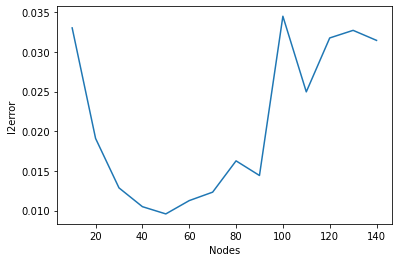

In [28]:
end = time.time()
print(f"Took {(end-start)* 1000.0:.3f} ms")

err = [x.detach().numpy() for x in L2Errors[]]

#with open('../output/Lowpass2LayerGraphSagel2Error' + str(1002) + 'Nodes' + '.pickle', 'wb') as output:
#    pickle.dump(err, output)


xAxis = list(range(10,150, 10))
fig = plt.figure()
plt.xlabel('Nodes')
plt.ylabel('l2error')
plt.plot(xAxis,err[:])
#fig.savefig('../output/Lowpass2LayerGraphSagel2Error' + str(1002) + 'Nodes.png', dpi=fig.dpi)
"""
slope, intercept = np.polyfit(np.log(xAxis[1:]), np.log(err[1:]), 1)
print(slope)
plt.loglog(xAxis[1:], err[1:], '--')
#fig.savefig('../output/LogLowpass2LayerGraphSagel2Error' + str(1002) + 'Nodes.png', dpi=fig.dpi)
"""

In [11]:
x = torch.rand(5, 5, dtype=torch.complex64)

In [12]:
xx = torch.zeros(10,10,dtype = torch.complex64)

In [13]:
xx[:5,:5] = x

In [14]:
ifft2 = torch.fft.ifft2(xx)

In [15]:
ifft2_real = ifft2.real

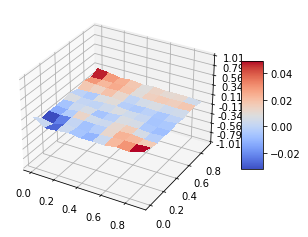

In [16]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 0.1)
Y = np.arange(0, 1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = ifft2_real.detach().numpy()

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()